# Multiple Linear Regression

mtcars data is used

In [10]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


Taking mpg as dependent variable and disp and hp as independent variables

In [11]:
model<-lm(mpg~disp+hp,data=mtcars)

Regression analysis summary is -

In [12]:
summary(model)


Call:
lm(formula = mpg ~ disp + hp, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7945 -2.3036 -0.8246  1.8582  6.9363 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 30.735904   1.331566  23.083  < 2e-16 ***
disp        -0.030346   0.007405  -4.098 0.000306 ***
hp          -0.024840   0.013385  -1.856 0.073679 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.127 on 29 degrees of freedom
Multiple R-squared:  0.7482,	Adjusted R-squared:  0.7309 
F-statistic: 43.09 on 2 and 29 DF,  p-value: 2.062e-09


In the above summary we can analyse that-
(if significance level is assumed 0.05)

p-value for intercept is less than 0.05 so null hypothesis is rejected that means intercept is significant in the model

p-value for disp is less than 0.05 so null hypothesis is rejected that means disp is significant in the model

p-value for hp is greater than 0.05, here we failed to reject the null hypothesis that means hp is not significant in the model


The residual standard error is used to measure how well a regression model fits a dataset.The RSE is an estimate of the standard deviation of residuals.
Residual standard error = √Σ(y – ŷ)2/df
RSE gives a comparative study of two models- if RSE(model1)<RSE(model2), then model1 fits better.


The R-squared statistic provides an alternative measure of fit. It always takes on a value between 0 and 1. R-square measures the proportion of variability in Y that can be explained using X. An R-square statistic that is close to 1 indicates that a large proportion of the variability in the response has been explained by the regression. A number near 0 indicates that the
regression did not explain much of the variability in the response. 
here, R-squared: 0.7482 


# Verifiying assumptions of Multiple Linear Regression

1. Linear relationship: There exists a linear relationship between each predictor variable and the response variable

In [13]:
library(ggplot2)

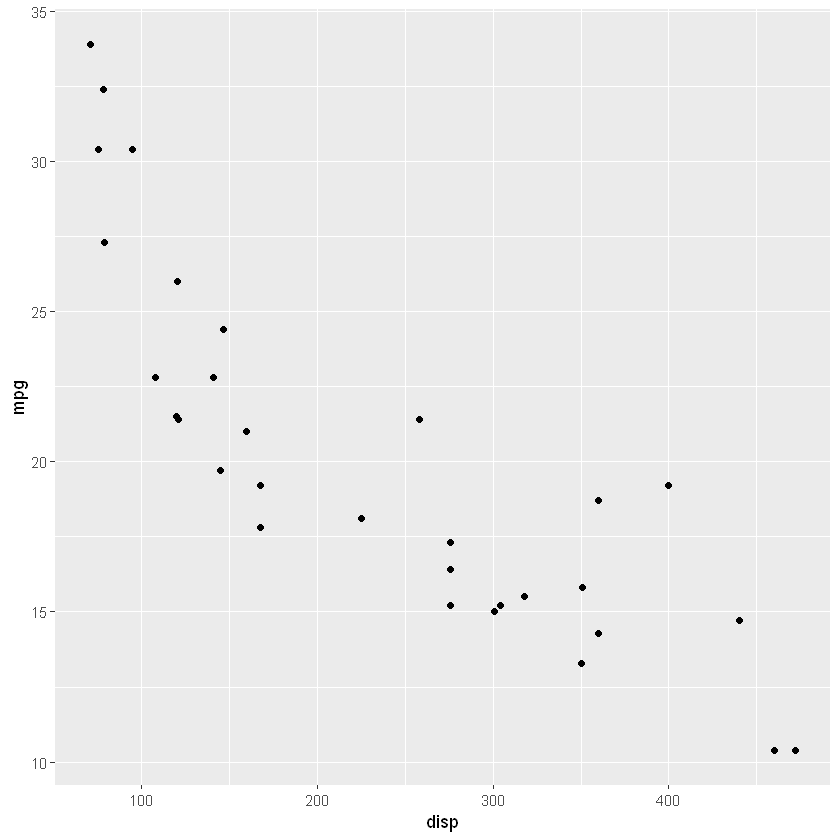

In [14]:
ggplot(mtcars,aes(x=disp,y=mpg))+geom_point()

In above plot there exist a linear relationship between mpg and disp

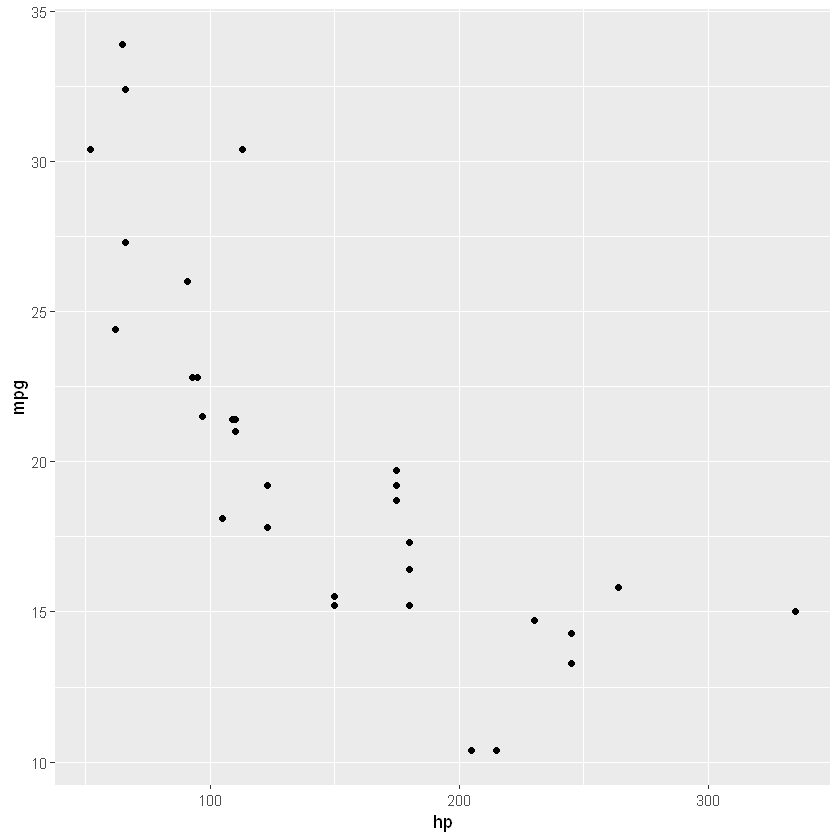

In [15]:
ggplot(mtcars,aes(x=hp,y=mpg))+geom_point()

In above plot we can see linear relationship between hp and mpg

2. No Multicollilearity : None of the predictor variables are highly correlated with each other. When one or more predictor variables are highly correlated, the regression model suffers from multicollinearity, which causes the coefficient estimates in the model to become unreliable.
                          
The easiest way to determine if this assumption is met is to calculate the VIF(Variance Inflation Factor) value for each predictor variable.
The VIF estimates how much the variance of a regression coefficient is inflated due to multicollinearity in the model.
    VIFi=1/(1 − Ri^2) ; R^2 is R-squared (Coefficient of deremination)

VIF values start at 1 and have no upper limit. As a general rule of thumb, VIF values greater than 5 indicate potential multicollinearity. Sometimes researchers use a VIF value of 10 instead, depending on the field of study.

In [16]:
library(car)

In [17]:
vif(model)

disp       hp 
2.670938 2.670938

vif value of disp and hp is less than 5 so no harmful multicollinearity present.

we can also use correlation matrix to see the correlation between independent variables to detect multicollinearity but in this method it is difficult to set a cutoff point of correlation coefficients of variables.

In [22]:
library(corrplot)

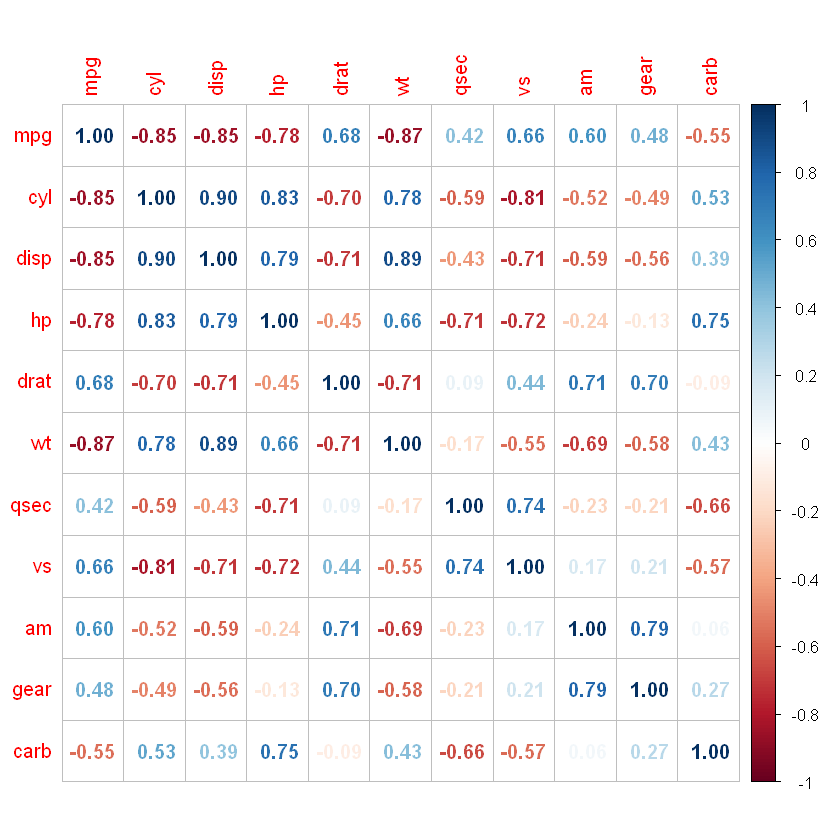

In [21]:
corrplot(cor(mtcars), method = "number")

3. Homoscedasticity: The residuals have constant variance at every point in the linear model. When this is not the case, the residuals are said to suffer from heteroscedasticity.

The simplest way to determine if this assumption is met is to create a plot of residuals versus predicted values. The predicted values for the response variable on the x-axis and the standardized residuals of the model on the y-axis.
i. If the points in the scatter plot exhibit a pattern, then heteroscedasticity is present.
ii. The following plot shows an example of a regression model where heteroscedasticity is not a problem.


In [25]:
p<-fitted.values(model)

In [27]:
library(MASS)

In [28]:
r1<-studres(model)

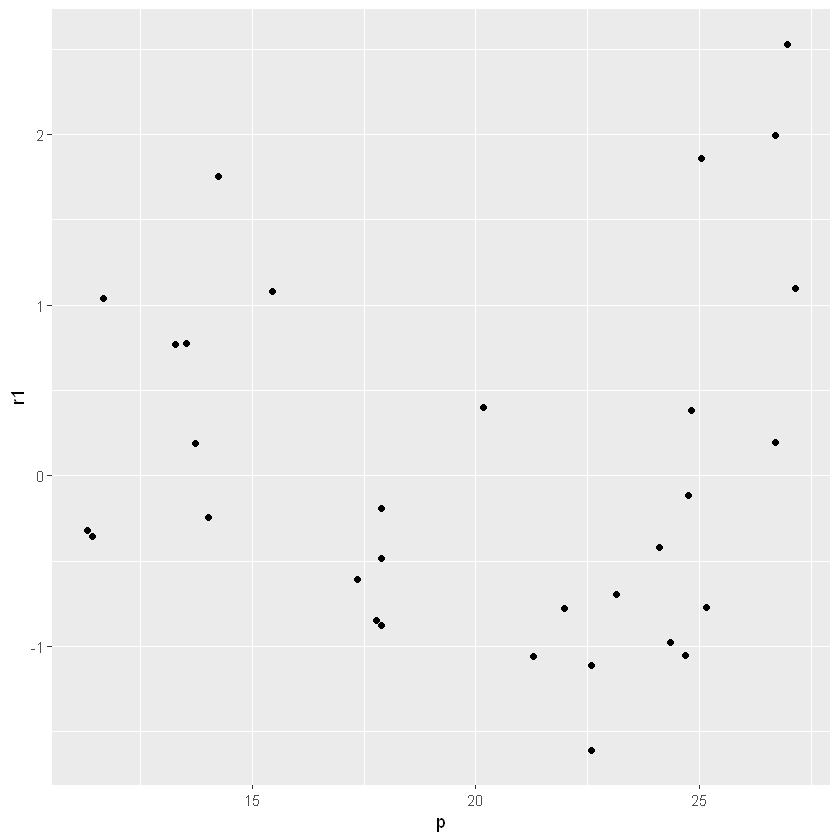

In [29]:
ggplot()+geom_point(aes(x=p,y=r1))

In above plot we can see heteroskedasticity is present.
There are some statistical test used to test heteroskedasticity-

i. Goldfeld-Quandt test   
ii. Breusch Pegan test

In [32]:
library(lmtest)

In [35]:
gqtest(model)


	Goldfeld-Quandt test

data:  model
GQ = 3.9274, df1 = 13, df2 = 13, p-value = 0.009761
alternative hypothesis: variance increases from segment 1 to 2


p-values is less than 0.05 hence null hypothesis is rejected that means heteroskedasticity is present.

4. No Autocorrelation: When the residuals are dependent on each other, there is autocorrelation.
The simplest way to determine if this assumption is met is to perform a Durbin-Watson test

In [36]:
durbinWatsonTest(model) 

 lag Autocorrelation D-W Statistic p-value
   1       0.2915306      1.369831   0.062
 Alternative hypothesis: rho != 0

p-value is greater than 0.05 so we failed to reject null hypothesis that mean rho=0, no correlation between errors.

5. Multivariate Normality: The residuals of the model are normally distributed.
normality is tested using non parametric tests like-
i. shapiro-wilk test 
ii. kolmogorov Smirnov test                                                                                                     
we also use some plots like histogram, qqplot

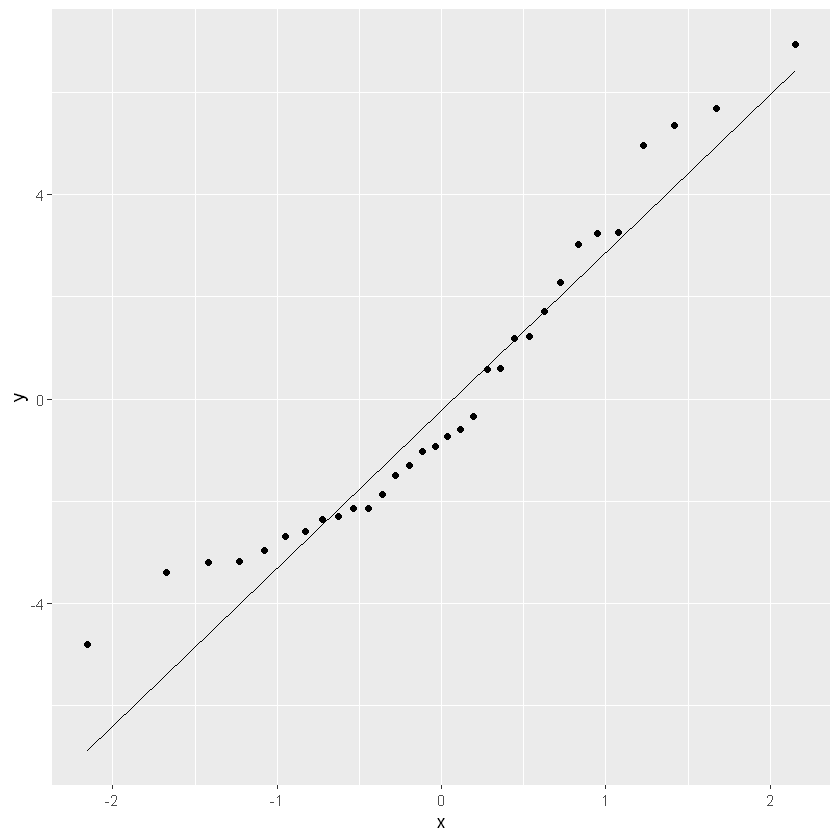

In [50]:
ggplot(model,aes(sample=residuals(model)))+stat_qq()+stat_qq_line()

we can see in plot error follow normal distribution.